<class 'pandas.core.frame.DataFrame'>
(569, 33)
X_train.shape:  (426, 30)
Y_train.shape:  (426,)
X_test.shape:  (143, 30)
Y_test.shape:  (143,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                992       
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 4.8816 - acc: 0.3263
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 1.5555 - acc: 0.5681
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6209 - acc: 0.7840
Epoch 4/100
14/14

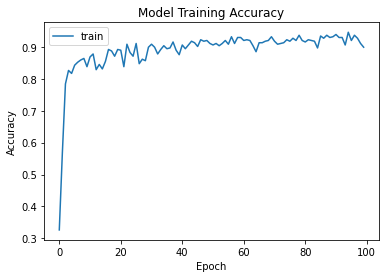

In [38]:
#Importing required libraries
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Input, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Reading csv file
dataset = pd.read_csv("Breast Cancer.csv")

#printing dataset type and shape
print(type(dataset))
print(dataset.shape)

# dropping id and Unnamed: 32 columns from the dataset
dataset.drop(['id','Unnamed: 32'],axis=1,inplace=True)

# Last column is our target [0, 1] which predicts the cancer 
#splitting the dataset into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(dataset.iloc[:,1:].values, dataset.iloc[:,0].values, test_size=0.25, random_state=42)

print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

# Label encoding the output feature 'diagnosis'

le = LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)
Y_test = le.transform(Y_test)

my_model = Sequential() # create a Sequential model

my_model.add(Input(shape=(30,))) # Input Layer

my_model.add(Dense(32, activation='relu')) # hidden layer
# Activation is taken as sigmoid as it is binary classification problem.
my_model.add(Dense(1, activation='sigmoid')) # output layer

my_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print(my_model.summary())

# The returned history object holds a record of the loss values and metric values during training
history =  my_model_fitted = my_model.fit(X_train, Y_train, epochs=100, verbose=1, shuffle=True)

#Plotting the accuracy of a given model
plt.plot(history.history['acc'])
# Adding the title for it
plt.title('Model Training Accuracy')
# Labeling a Accuracy on Y-Axis
plt.ylabel('Accuracy')
# Labeling a Eoch on X-Axis
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()



In [39]:

print(my_model.evaluate(X_test, Y_test))

5/5 [==============================] - 0s 3ms/step - loss: 0.1417 - acc: 0.9371
[0.14165817201137543, 0.9370629191398621]


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                992       
                                                                 
 dense_20 (Dense)            (None, 54)                1782      
                                                                 
 dense_21 (Dense)            (None, 1)                 55        
                                                                 
Total params: 2,829
Trainable params: 2,829
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 36.0138 - acc: 0.4413
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 9.3357 - acc: 0.3850
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 3.2497 - acc: 0.5563
Epoch 4/100
14/14 [=========

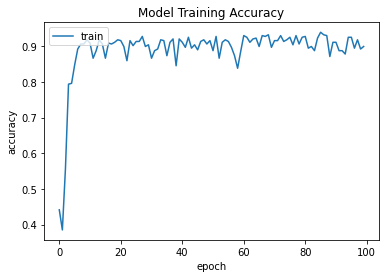

In [40]:
#Adding more dense layers to see the changes
my_model = Sequential() # create a Sequential model

my_model.add(Input(shape=(30,))) # Input Layer

my_model.add(Dense(32, activation='relu')) # hidden layer
my_model.add(Dense(54, activation='relu')) # hidden layer

my_model.add(Dense(1, activation='sigmoid')) # output layer 
# Adding the loss function and optimezer
my_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print(my_model.summary())

# The returned history object holds a record of the loss values and metric values during training
history =  my_model_fitted = my_model.fit(X_train, Y_train, epochs=100, verbose=1, shuffle=True)

# Plotting the accuracy of a model after adding dense layers
plt.plot(history.history['acc'])
plt.title('Model Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()



In [41]:
#Printing loss and accuracy using evlaute
print(my_model.evaluate(X_test, Y_test))

5/5 [==============================] - 0s 2ms/step - loss: 0.3064 - acc: 0.9161
[0.3063713610172272, 0.9160839319229126]


Epoch 1/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2893 - acc: 0.9202 - val_loss: 0.0902 - val_acc: 0.9580
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2589 - acc: 0.9249 - val_loss: 0.1155 - val_acc: 0.9441
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2692 - acc: 0.9155 - val_loss: 0.0809 - val_acc: 0.9720
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3197 - acc: 0.8991 - val_loss: 0.5535 - val_acc: 0.9021
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6259 - acc: 0.8451 - val_loss: 0.9556 - val_acc: 0.7063
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4876 - acc: 0.8498 - val_loss: 0.1626 - val_acc: 0.9371
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2475 - acc: 0.9319 - val_loss: 0.2203 - val_acc: 0.9091
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2317 - a

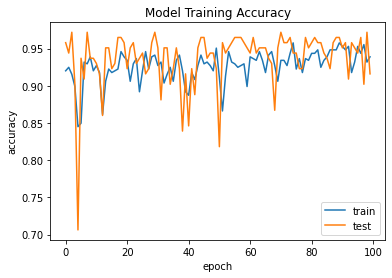

In [42]:
# The returned history object holds a record of the loss values and metric values during training
history =  my_model_fitted = my_model.fit(X_train, Y_train, epochs=100, verbose=1, shuffle=True, validation_data=(X_test, Y_test))
print(history)
#ploting the accuracy after adding validation data
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()



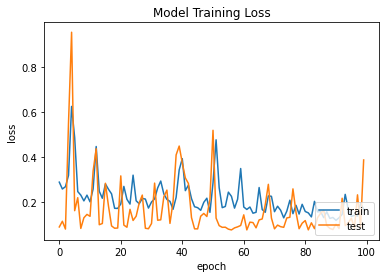

In [43]:
#ploting the loss after adding validation data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4046 - acc: 0.8826
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1363 - acc: 0.9507
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0836 - acc: 0.9765
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0738 - acc: 0.9718
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0600 - acc: 0.9859
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0494 - acc: 0.9859
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0466 - acc: 0.9859
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0405 - acc: 0.9883
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0359 - acc: 0.9859
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0338 - acc: 0.9906
Epoch 11/100
14/14 [==============================] - 0s 2m

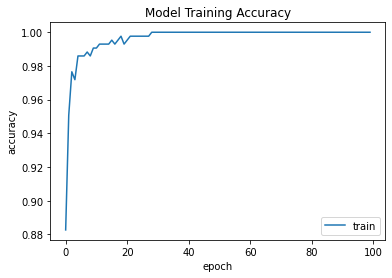

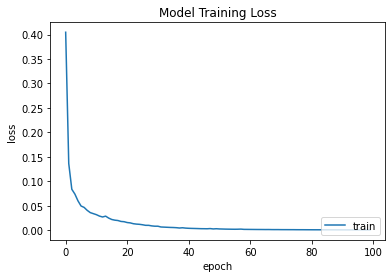

In [44]:
#Normalising the data using scaler function given
# importing the StandardScaler from sklearn library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fitting and transforming the StandardScaler on train data and test data
X_train_transform=sc.fit_transform(X_train)
X_test_transform=sc.transform(X_test)

# The returned history object holds a record of the loss values and metric values during training
history =  my_model_fitted = my_model.fit(X_train_transform, Y_train, epochs=100, verbose=1, shuffle=True)

# Plotting accuracy after normalization
plt.plot(history.history['acc'])
plt.title('Model Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

#ploting the loss after anormalisation
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()


In [34]:
#Printing loss and accuracy
print(my_model.evaluate(X_test_transform, Y_test))

5/5 [==============================] - 0s 4ms/step - loss: 0.1715 - acc: 0.9720
[0.17148415744304657, 0.9720279574394226]
